<a href="https://colab.research.google.com/github/YanjunLin-Andrie/elan_price_prediction/blob/main/ELAN_future_300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 14.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
pip install yahoo-fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 4.0 MB/s 
     |████████████████████████████████| 83 kB 1.4 MB/s 
     |████████████████████████████████| 139 kB 38.4 MB/s 
     |████████████████████████████████| 112 kB 41.5 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=25a4b3c0689afbfecb70a2223fa5804f54caed7eb4b684e01dfde0aeb9938d72
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=546aa1e3992945a7628b2e73023773532b232162c4a35191e5ad8ad496a024a2
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=3762a0ffc7d3a3e9a88be9e5c6691eaf3b4454419fb4e621812bb

In [3]:
import tensorflow as tf
import yfinance as yf
from yahoo_fin.stock_info import get_data

In [4]:
import pandas as pd
import numpy as np

In [5]:
#get all ELAN trading history until today from yahoo finance
df = get_data('ELAN', index_as_date = True).drop(columns = 'ticker')
df

,open,high,low,close,adjclose,volume
2018-09-20,32.250000,36.009998,32.049999,36.000000,36.000000,40182700
2018-09-21,34.560001,35.490002,33.880001,34.099998,34.099998,9269500
2018-09-24,34.099998,35.650002,33.700001,34.900002,34.900002,2769100
2018-09-25,34.759998,34.990002,34.060001,34.580002,34.580002,3152200
2018-09-26,34.349998,35.980000,34.250000,35.500000,35.500000,5835600
...,...,...,...,...,...,...
2022-07-12,20.049999,20.379999,19.870001,19.990000,19.990000,2555200
2022-07-13,19.580000,19.830000,19.350000,19.700001,19.700001,3059500
2022-07-14,19.410000,19.639999,19.110001,19.610001,19.610001,3400800
2022-07-15,19.740000,20.110001,19.480000,20.080000,20.080000,3504600


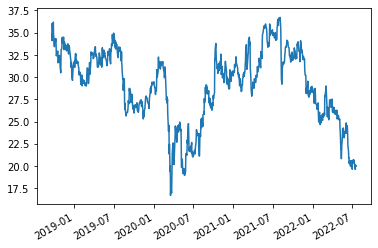

In [6]:
df['close'].plot()

In [7]:
len(df)

962

In [8]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1): # i in range(962-10-1) # i in range(951)
        features = df.iloc[i:(i + window), feature_col_number] # df.iloc[0: 10, 'Close']
        target = df.iloc[(i + window), target_col_number] # df.iloc[10, 'Close']
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [9]:
window_size=10

In [10]:
X, y=window_data(df, window_size, 3, 3)
display(X)
display(y)

array([[36.        , 34.09999847, 34.90000153, ..., 33.72999954,
        33.41999817, 34.25      ],
       [34.09999847, 34.90000153, 34.58000183, ..., 33.41999817,
        34.25      , 34.02000046],
       [34.90000153, 34.58000183, 35.5       , ..., 34.25      ,
        34.02000046, 34.34000015],
       ...,
       [20.13999939, 20.        , 19.62999916, ..., 20.45000076,
        20.21999931, 19.98999977],
       [20.        , 19.62999916, 20.62000084, ..., 20.21999931,
        19.98999977, 19.70000076],
       [19.62999916, 20.62000084, 20.64999962, ..., 19.98999977,
        19.70000076, 19.61000061]])

array([[34.02000046],
       [34.34000015],
       [34.00999832],
       [34.31999969],
       [33.52999878],
       [32.38999939],
       [32.58000183],
       [32.45999908],
       [32.61000061],
       [32.93000031],
       [31.79999924],
       [31.61000061],
       [31.87999916],
       [32.43999863],
       [31.73999977],
       [31.95999908],
       [32.43000031],
       [30.90999985],
       [30.85000038],
       [30.47999954],
       [31.87999916],
       [33.09999847],
       [33.24000168],
       [33.81000137],
       [34.45999908],
       [33.81999969],
       [34.45999908],
       [34.15999985],
       [34.5       ],
       [34.00999832],
       [33.09000015],
       [34.        ],
       [33.79999924],
       [33.13000107],
       [33.15999985],
       [33.61000061],
       [33.        ],
       [32.95000076],
       [33.47999954],
       [33.47999954],
       [33.40999985],
       [33.75      ],
       [33.06999969],
       [32.59999847],
       [33.56999969],
       [33

In [11]:
len(y)

951

In [12]:
from sklearn.preprocessing import MinMaxScaler
X_scaler=MinMaxScaler()
X_scaler.fit(X)
X_scaled=X_scaler.transform(X)

In [13]:
X

array([[36.        , 34.09999847, 34.90000153, ..., 33.72999954,
        33.41999817, 34.25      ],
       [34.09999847, 34.90000153, 34.58000183, ..., 33.41999817,
        34.25      , 34.02000046],
       [34.90000153, 34.58000183, 35.5       , ..., 34.25      ,
        34.02000046, 34.34000015],
       ...,
       [20.13999939, 20.        , 19.62999916, ..., 20.45000076,
        20.21999931, 19.98999977],
       [20.        , 19.62999916, 20.62000084, ..., 20.21999931,
        19.98999977, 19.70000076],
       [19.62999916, 20.62000084, 20.64999962, ..., 19.98999977,
        19.70000076, 19.61000061]])

In [14]:
split=int(0.7*len(X_scaled))
X_train=X_scaled[:split]
X_test=X_scaled[split:]



In [15]:
y_scaler=MinMaxScaler()
y_scaler.fit(y)
y_scaled=y_scaler.transform(y)
y_train=y_scaled[:split]
y_test=y_scaled[split:]


In [16]:

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(665, 10)

(286, 10)

(665, 1)

(286, 1)

In [17]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
display(X_train.shape)
display(X_test.shape)

(665, 10, 1)

(286, 10, 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [19]:
model=Sequential()
first_lstm_layer=LSTM(units=30, return_sequences=True, input_shape=(window_size, 1))
model.add(first_lstm_layer)
first_dropout_layer=Dropout(0.2)
model.add(first_dropout_layer)
second_lstm_layer=LSTM(units=30, return_sequences=True)
model.add(second_lstm_layer)
second_dropout_layer=Dropout(0.2)
model.add(second_dropout_layer)
third_lstm_layer=LSTM(units=30)
model.add(third_lstm_layer)
output_layer=Dense(units=1, activation='linear')
model.add(output_layer)

In [20]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 30)            3840      
                                                                 
 dropout (Dropout)           (None, 10, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 30)            7320      
                                                                 
 dropout_1 (Dropout)         (None, 10, 30)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 18,511
Trainable params: 18,511
Non-traina

In [22]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
21/21 [==============================] - 8s 25ms/step - loss: 0.1554 - mean_squared_error: 0.1554
Epoch 2/10
21/21 [==============================] - 1s 27ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 3/10
21/21 [==============================] - 1s 25ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 4/10
21/21 [==============================] - 1s 29ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 5/10
21/21 [==============================] - 1s 25ms/step - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 6/10
21/21 [==============================] - 1s 25ms/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 7/10
21/21 [==============================] - 1s 26ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 8/10
21/21 [==============================] - 1s 28ms/step - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 9/10
21/21 [==============================] - 1s 26ms/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 10/10
21/21 [

In [23]:
prediction=model.predict(X_test)

In [24]:
display(prediction)

array([[0.92348945],
       [0.93455845],
       [0.9407072 ],
       [0.94543934],
       [0.94801384],
       [0.94928414],
       [0.94697654],
       [0.9418393 ],
       [0.9338433 ],
       [0.925209  ],
       [0.9134859 ],
       [0.8995999 ],
       [0.8843808 ],
       [0.8728753 ],
       [0.86457604],
       [0.8619903 ],
       [0.86646867],
       [0.87585753],
       [0.8871338 ],
       [0.89555305],
       [0.90571827],
       [0.914742  ],
       [0.9244831 ],
       [0.9260043 ],
       [0.9204381 ],
       [0.91663885],
       [0.91884273],
       [0.9194838 ],
       [0.9176266 ],
       [0.91565114],
       [0.91367704],
       [0.91128725],
       [0.9068601 ],
       [0.90196496],
       [0.9002538 ],
       [0.8961957 ],
       [0.89219517],
       [0.89002895],
       [0.8906983 ],
       [0.8941763 ],
       [0.89883983],
       [0.9033608 ],
       [0.9143961 ],
       [0.9273996 ],
       [0.9408574 ],
       [0.95460707],
       [0.96845806],
       [0.974

In [25]:
import matplotlib.pyplot as plt

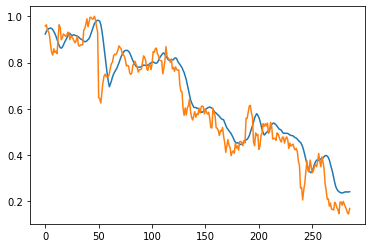

In [26]:
plt.plot(prediction)
plt.plot(y_test.ravel())

In [27]:
y_predicted=y_scaler.inverse_transform(prediction)

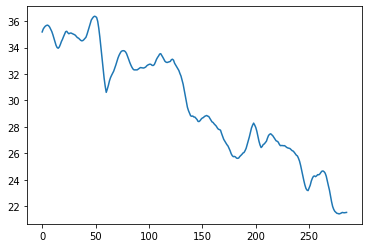

In [28]:
plt.plot(y_predicted)

In [29]:
# one prediction

last_input=df.iloc[-window_size:, :]['close'].values
input_scaled=X_scaler.transform([last_input])
input_reshaped=input_scaled.reshape(1, window_size, 1)
next_prediction=model.predict(input_reshaped)
y_scaler.inverse_transform(next_prediction)

array([[21.491463]], dtype=float32)

In [30]:
last_input=df.iloc[-window_size:, :]['close'].values
for i in range(200): 
  input_array=last_input[-window_size:]
  # display(input_array)
  input_scaled=X_scaler.transform([input_array])
  input_reshaped=input_scaled.reshape(1, window_size, 1)
  prediction_scaled=model.predict(input_reshaped)
  
  next_prediction=y_scaler.inverse_transform(prediction_scaled)
  display(next_prediction)
  last_input=np.append(last_input, next_prediction)

array([[21.491463]], dtype=float32)

array([[21.434572]], dtype=float32)

array([[21.436792]], dtype=float32)

array([[21.438831]], dtype=float32)

array([[21.497282]], dtype=float32)

array([[21.605846]], dtype=float32)

array([[21.758509]], dtype=float32)

array([[21.95548]], dtype=float32)

array([[22.172756]], dtype=float32)

array([[22.353643]], dtype=float32)

array([[22.55349]], dtype=float32)

array([[22.616829]], dtype=float32)

array([[22.705507]], dtype=float32)

array([[22.811737]], dtype=float32)

array([[22.93342]], dtype=float32)

array([[23.062819]], dtype=float32)

array([[23.193438]], dtype=float32)

array([[23.32003]], dtype=float32)

array([[23.437908]], dtype=float32)

array([[23.545261]], dtype=float32)

array([[23.646198]], dtype=float32)

array([[23.738935]], dtype=float32)

array([[23.837492]], dtype=float32)

array([[23.93837]], dtype=float32)

array([[24.039072]], dtype=float32)

array([[24.13756]], dtype=float32)

array([[24.232786]], dtype=float32)

array([[24.324518]], dtype=float32)

array([[24.413113]], dtype=float32)

array([[24.499395]], dtype=float32)

array([[24.5843]], dtype=float32)

array([[24.66827]], dtype=float32)

array([[24.751896]], dtype=float32)

array([[24.834269]], dtype=float32)

array([[24.914946]], dtype=float32)

array([[24.993782]], dtype=float32)

array([[25.07089]], dtype=float32)

array([[25.146486]], dtype=float32)

array([[25.220802]], dtype=float32)

array([[25.294027]], dtype=float32)

array([[25.366236]], dtype=float32)

array([[25.437416]], dtype=float32)

array([[25.507517]], dtype=float32)

array([[25.576439]], dtype=float32)

array([[25.64419]], dtype=float32)

array([[25.710838]], dtype=float32)

array([[25.77647]], dtype=float32)

array([[25.841154]], dtype=float32)

array([[25.904928]], dtype=float32)

array([[25.967821]], dtype=float32)

array([[26.029839]], dtype=float32)

array([[26.090979]], dtype=float32)

array([[26.151255]], dtype=float32)

array([[26.210686]], dtype=float32)

array([[26.2693]], dtype=float32)

array([[26.327137]], dtype=float32)

array([[26.38422]], dtype=float32)

array([[26.440573]], dtype=float32)

array([[26.496204]], dtype=float32)

array([[26.551138]], dtype=float32)

array([[26.605377]], dtype=float32)

array([[26.658943]], dtype=float32)

array([[26.711851]], dtype=float32)

array([[26.764116]], dtype=float32)

array([[26.815763]], dtype=float32)

array([[26.8668]], dtype=float32)

array([[26.917246]], dtype=float32)

array([[26.967113]], dtype=float32)

array([[27.016409]], dtype=float32)

array([[27.065151]], dtype=float32)

array([[27.113354]], dtype=float32)

array([[27.161016]], dtype=float32)

array([[27.208168]], dtype=float32)

array([[27.254808]], dtype=float32)

array([[27.300953]], dtype=float32)

array([[27.346613]], dtype=float32)

array([[27.3918]], dtype=float32)

array([[27.43652]], dtype=float32)

array([[27.480782]], dtype=float32)

array([[27.524597]], dtype=float32)

array([[27.567976]], dtype=float32)

array([[27.610928]], dtype=float32)

array([[27.653458]], dtype=float32)

array([[27.695574]], dtype=float32)

array([[27.737291]], dtype=float32)

array([[27.77861]], dtype=float32)

array([[27.81954]], dtype=float32)

array([[27.860092]], dtype=float32)

array([[27.90027]], dtype=float32)

array([[27.940079]], dtype=float32)

array([[27.979532]], dtype=float32)

array([[28.018631]], dtype=float32)

array([[28.05738]], dtype=float32)

array([[28.095797]], dtype=float32)

array([[28.133877]], dtype=float32)

array([[28.171627]], dtype=float32)

array([[28.209057]], dtype=float32)

array([[28.246168]], dtype=float32)

array([[28.28297]], dtype=float32)

array([[28.31947]], dtype=float32)

array([[28.355661]], dtype=float32)

array([[28.391565]], dtype=float32)

array([[28.42718]], dtype=float32)

array([[28.462505]], dtype=float32)

array([[28.497551]], dtype=float32)

array([[28.532322]], dtype=float32)

array([[28.566822]], dtype=float32)

array([[28.601055]], dtype=float32)

array([[28.635027]], dtype=float32)

array([[28.668737]], dtype=float32)

array([[28.702196]], dtype=float32)

array([[28.735403]], dtype=float32)

array([[28.768366]], dtype=float32)

array([[28.801086]], dtype=float32)

array([[28.833565]], dtype=float32)

array([[28.865814]], dtype=float32)

array([[28.897827]], dtype=float32)

array([[28.929613]], dtype=float32)

array([[28.961176]], dtype=float32)

array([[28.992516]], dtype=float32)

array([[29.02364]], dtype=float32)

array([[29.05455]], dtype=float32)

array([[29.085245]], dtype=float32)

array([[29.115734]], dtype=float32)

array([[29.146019]], dtype=float32)

array([[29.1761]], dtype=float32)

array([[29.205978]], dtype=float32)

array([[29.235659]], dtype=float32)

array([[29.26515]], dtype=float32)

array([[29.29445]], dtype=float32)

array([[29.323559]], dtype=float32)

array([[29.35248]], dtype=float32)

array([[29.38122]], dtype=float32)

array([[29.409779]], dtype=float32)

array([[29.438156]], dtype=float32)

array([[29.466356]], dtype=float32)

array([[29.494385]], dtype=float32)

array([[29.52224]], dtype=float32)

array([[29.549927]], dtype=float32)

array([[29.577442]], dtype=float32)

array([[29.604797]], dtype=float32)

array([[29.631985]], dtype=float32)

array([[29.659016]], dtype=float32)

array([[29.68588]], dtype=float32)

array([[29.712593]], dtype=float32)

array([[29.739151]], dtype=float32)

array([[29.76555]], dtype=float32)

array([[29.791801]], dtype=float32)

array([[29.817905]], dtype=float32)

array([[29.843857]], dtype=float32)

array([[29.869661]], dtype=float32)

array([[29.895323]], dtype=float32)

array([[29.920843]], dtype=float32)

array([[29.946218]], dtype=float32)

array([[29.971457]], dtype=float32)

array([[29.996555]], dtype=float32)

array([[30.021517]], dtype=float32)

array([[30.046349]], dtype=float32)

array([[30.071043]], dtype=float32)

array([[30.095606]], dtype=float32)

array([[30.120035]], dtype=float32)

array([[30.14434]], dtype=float32)

array([[30.168518]], dtype=float32)

array([[30.192564]], dtype=float32)

array([[30.216492]], dtype=float32)

array([[30.240288]], dtype=float32)

array([[30.263968]], dtype=float32)

array([[30.287525]], dtype=float32)

array([[30.310963]], dtype=float32)

array([[30.334282]], dtype=float32)

array([[30.357481]], dtype=float32)

array([[30.380566]], dtype=float32)

array([[30.403538]], dtype=float32)

array([[30.426394]], dtype=float32)

array([[30.449139]], dtype=float32)

array([[30.47177]], dtype=float32)

array([[30.494293]], dtype=float32)

array([[30.516705]], dtype=float32)

array([[30.539011]], dtype=float32)

array([[30.561205]], dtype=float32)

array([[30.583292]], dtype=float32)

array([[30.605282]], dtype=float32)

array([[30.62716]], dtype=float32)

array([[30.64894]], dtype=float32)

array([[30.670614]], dtype=float32)

array([[30.692188]], dtype=float32)

array([[30.71366]], dtype=float32)

array([[30.735031]], dtype=float32)

array([[30.756306]], dtype=float32)

array([[30.777483]], dtype=float32)

array([[30.798563]], dtype=float32)

array([[30.819544]], dtype=float32)

array([[30.840435]], dtype=float32)

array([[30.861227]], dtype=float32)

array([[30.881926]], dtype=float32)

array([[30.902533]], dtype=float32)

array([[30.92305]], dtype=float32)

array([[30.94347]], dtype=float32)

array([[30.963808]], dtype=float32)

array([[30.984049]], dtype=float32)

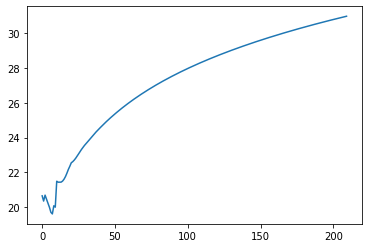

In [31]:
plt.plot(last_input)

In [83]:
### New Approach ###
#### No splitting between train and test set

In [58]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1): 
        features = df.iloc[i:(i + window), feature_col_number] 
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [59]:
window_size=10

In [60]:
X, y=window_data(df, window_size, 3, 3)
display(X)
display(y)

array([[36.        , 34.09999847, 34.90000153, ..., 33.72999954,
        33.41999817, 34.25      ],
       [34.09999847, 34.90000153, 34.58000183, ..., 33.41999817,
        34.25      , 34.02000046],
       [34.90000153, 34.58000183, 35.5       , ..., 34.25      ,
        34.02000046, 34.34000015],
       ...,
       [20.13999939, 20.        , 19.62999916, ..., 20.45000076,
        20.21999931, 19.98999977],
       [20.        , 19.62999916, 20.62000084, ..., 20.21999931,
        19.98999977, 19.70000076],
       [19.62999916, 20.62000084, 20.64999962, ..., 19.98999977,
        19.70000076, 19.61000061]])

array([[34.02000046],
       [34.34000015],
       [34.00999832],
       [34.31999969],
       [33.52999878],
       [32.38999939],
       [32.58000183],
       [32.45999908],
       [32.61000061],
       [32.93000031],
       [31.79999924],
       [31.61000061],
       [31.87999916],
       [32.43999863],
       [31.73999977],
       [31.95999908],
       [32.43000031],
       [30.90999985],
       [30.85000038],
       [30.47999954],
       [31.87999916],
       [33.09999847],
       [33.24000168],
       [33.81000137],
       [34.45999908],
       [33.81999969],
       [34.45999908],
       [34.15999985],
       [34.5       ],
       [34.00999832],
       [33.09000015],
       [34.        ],
       [33.79999924],
       [33.13000107],
       [33.15999985],
       [33.61000061],
       [33.        ],
       [32.95000076],
       [33.47999954],
       [33.47999954],
       [33.40999985],
       [33.75      ],
       [33.06999969],
       [32.59999847],
       [33.56999969],
       [33

In [82]:
len(y)

951

In [61]:
from sklearn.preprocessing import MinMaxScaler
X_scaler=MinMaxScaler()
X_scaler.fit(X)
X_scaled=X_scaler.transform(X)

In [62]:
y_scaler=MinMaxScaler()
y_scaler.fit(y)
y_scaled=y_scaler.transform(y)


In [63]:
X_scaled=X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
display(X.shape)

(951, 10)

In [64]:
model=Sequential()
first_lstm_layer=LSTM(units=30, return_sequences=True, input_shape=(window_size, 1))
model.add(first_lstm_layer)
first_dropout_layer=Dropout(0.2)
model.add(first_dropout_layer)
second_lstm_layer=LSTM(units=30, return_sequences=True)
model.add(second_lstm_layer)
second_dropout_layer=Dropout(0.2)
model.add(second_dropout_layer)
third_lstm_layer=LSTM(units=30)
model.add(third_lstm_layer)
output_layer=Dense(units=1, activation='linear')
model.add(output_layer)

In [65]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error')

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 30)            3840      
                                                                 
 dropout_4 (Dropout)         (None, 10, 30)            0         
                                                                 
 lstm_7 (LSTM)               (None, 10, 30)            7320      
                                                                 
 dropout_5 (Dropout)         (None, 10, 30)            0         
                                                                 
 lstm_8 (LSTM)               (None, 30)                7320      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 18,511
Trainable params: 18,511
Non-trai

In [67]:
model.fit(X_scaled, y_scaled, epochs=10)

Epoch 1/10
30/30 [==============================] - 5s 14ms/step - loss: 0.1320 - mean_squared_error: 0.1320
Epoch 2/10
30/30 [==============================] - 0s 15ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 3/10
30/30 [==============================] - 0s 16ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 4/10
30/30 [==============================] - 0s 15ms/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 5/10
30/30 [==============================] - 0s 14ms/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 6/10
30/30 [==============================] - 0s 14ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 7/10
30/30 [==============================] - 0s 15ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 8/10
30/30 [==============================] - 0s 15ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 9/10
30/30 [==============================] - 0s 14ms/step - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 10/10
30/30 [

In [68]:
prediction=model.predict(X_scaled)

In [69]:
import matplotlib.pyplot as plt

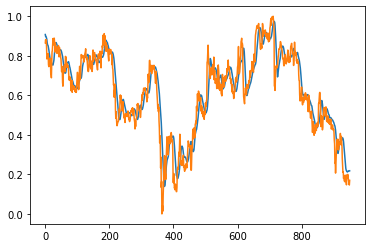

In [70]:
plt.plot(prediction)
plt.plot(y_scaled.ravel())

In [71]:
y_predicted=y_scaler.inverse_transform(prediction)

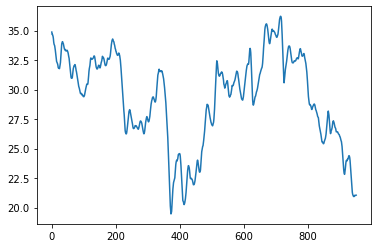

In [72]:
plt.plot(y_predicted)

In [73]:
old_X_scaled=X_scaled.copy()
old_y_scaled=y_scaled.copy()

In [74]:
X_scaled

array([[[0.9640718 ],
        [0.86926135],
        [0.90918166],
        ...,
        [0.85079833],
        [0.8353292 ],
        [0.87674645]],

       [[0.86926135],
        [0.90918166],
        [0.89321361],
        ...,
        [0.8353292 ],
        [0.87674645],
        [0.86526943]],

       [[0.90918166],
        [0.89321361],
        [0.9391217 ],
        ...,
        [0.87674645],
        [0.86526943],
        [0.88123748]],

       ...,

       [[0.17265464],
        [0.16566864],
        [0.14720552],
        ...,
        [0.18812377],
        [0.17664665],
        [0.16516963]],

       [[0.16566864],
        [0.14720552],
        [0.1966068 ],
        ...,
        [0.17664665],
        [0.16516963],
        [0.15069862]],

       [[0.14720552],
        [0.1966068 ],
        [0.19810375],
        ...,
        [0.16516963],
        [0.15069862],
        [0.14620759]]])

In [75]:
# last_input=df.iloc[-window_size:, :]['Close'].values

for i in range(300): 
  # input_array=last_input[-window_size:]
  # display(input_array)
  # input_scaled=X_scaler.transform([input_array])
  # input_reshaped=input_scaled.reshape(1, window_size, 1)
  # prediction_scaled=model.predict(X_scaled[-1])
  prediction_scaled=model.predict(X_scaled[-1].reshape(1, window_size, 1))
  
  next_prediction=y_scaler.inverse_transform(prediction_scaled)
  display(next_prediction)
  new_train_sample=np.append(X_scaled[-1], prediction_scaled)[1:].reshape(1, window_size, 1)
  X_scaled=np.append(X_scaled, new_train_sample, axis=0)
  y_scaled=np.append(y_scaled, prediction_scaled, axis=0)
  model.fit(X_scaled, y_scaled, epochs=5)
  # last_input=np.append(last_input, next_prediction)
  # input_array

array([[21.050142]], dtype=float32)

Epoch 1/5
30/30 [==============================] - 1s 27ms/step - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 2/5
30/30 [==============================] - 1s 28ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 3/5
30/30 [==============================] - 1s 22ms/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 4/5
30/30 [==============================] - 1s 34ms/step - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 5/5
30/30 [==============================] - 1s 22ms/step - loss: 0.0069 - mean_squared_error: 0.0069


array([[21.112051]], dtype=float32)

Epoch 1/5
30/30 [==============================] - 1s 25ms/step - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 2/5
30/30 [==============================] - 1s 21ms/step - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 3/5
30/30 [==============================] - 1s 21ms/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 4/5
30/30 [==============================] - 0s 17ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 5/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0065 - mean_squared_error: 0.0065


array([[20.620651]], dtype=float32)

Epoch 1/5
30/30 [==============================] - 0s 16ms/step - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 2/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 3/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 4/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 5/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0056 - mean_squared_error: 0.0056


array([[20.456434]], dtype=float32)

Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 2/5
30/30 [==============================] - 0s 16ms/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 3/5
30/30 [==============================] - 0s 16ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 4/5
30/30 [==============================] - 0s 16ms/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 5/5
30/30 [==============================] - 0s 16ms/step - loss: 0.0051 - mean_squared_error: 0.0051


array([[20.616264]], dtype=float32)

Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 2/5
30/30 [==============================] - 0s 16ms/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 3/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 4/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 5/5
30/30 [==============================] - 1s 17ms/step - loss: 0.0048 - mean_squared_error: 0.0048


array([[20.615522]], dtype=float32)

Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 2/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 3/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 4/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 5/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039


array([[20.574293]], dtype=float32)

Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 2/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 3/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 4/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 5/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0042 - mean_squared_error: 0.0042


array([[20.731457]], dtype=float32)

Epoch 1/5
30/30 [==============================] - 0s 16ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 2/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 4/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 5/5
30/30 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036


array([[20.893599]], dtype=float32)

Epoch 1/5
30/30 [==============================] - 3s 11ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 4/5
30/30 [==============================] - 0s 11ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 5/5
30/30 [==============================] - 0s 11ms/step - loss: 0.0034 - mean_squared_error: 0.0034


array([[21.030985]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 4/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0034 - mean_squared_error: 0.0034


array([[21.076458]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 2/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 3/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 4/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 5/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0028 - mean_squared_error: 0.0028


array([[20.668898]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 2/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 4/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 5/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029


array([[21.216465]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 3/5
31/31 [==============================] - 1s 16ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 5/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0024 - mean_squared_error: 0.0024


array([[21.169518]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 1s 17ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025


array([[21.290354]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 2/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 4/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021


array([[20.95877]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023


array([[21.354221]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 2/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019


array([[21.405296]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 1s 16ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 3/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 4/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 5/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020


array([[21.480524]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 3/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 5/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0017 - mean_squared_error: 0.0017


array([[21.666712]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 5/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0017 - mean_squared_error: 0.0017


array([[21.416882]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 1s 21ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2/5
31/31 [==============================] - 1s 21ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 3/5
31/31 [==============================] - 1s 21ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 4/5
31/31 [==============================] - 1s 18ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017


array([[21.89658]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 3/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016


array([[21.941525]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 5/5
31/31 [==============================] - 1s 16ms/step - loss: 0.0018 - mean_squared_error: 0.0018


array([[21.684029]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016


array([[21.78616]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
31/31 [==============================] - 1s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016


array([[21.722008]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015


array([[21.853455]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016


array([[21.599699]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
31/31 [==============================] - 1s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017


array([[21.722057]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 5/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0016 - mean_squared_error: 0.0016


array([[21.828814]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016


array([[21.608744]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0017 - mean_squared_error: 0.0017


array([[21.411469]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.35247]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.398052]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 5/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015


array([[21.575195]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015


array([[21.1835]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015


array([[21.567335]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.544144]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 1s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.50002]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 1s 17ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017


array([[21.524576]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 14ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 3/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
31/31 [==============================] - 0s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
31/31 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.343348]], dtype=float32)

Epoch 1/5
31/31 [==============================] - 0s 11ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
31/31 [==============================] - 0s 10ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
31/31 [==============================] - 0s 11ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4/5
31/31 [==============================] - 0s 11ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
31/31 [==============================] - 0s 12ms/step - loss: 0.0015 - mean_squared_error: 0.0015


array([[21.218088]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.24024]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.523586]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017


array([[21.10587]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.497477]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 1s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.391289]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.37014]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015


array([[21.36432]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.471704]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015


array([[21.235474]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.208586]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.608694]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.6639]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.688602]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.700905]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 1s 17ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.228107]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.029749]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[20.83004]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[20.90404]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[20.822224]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[20.594984]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
32/32 [==============================] - 0s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[20.815765]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[20.756565]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.05195]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.263458]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.441772]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.260675]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.177094]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.087883]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
32/32 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.602577]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.482048]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 1s 17ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
32/32 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.710373]], dtype=float32)

Epoch 1/5
32/32 [==============================] - 0s 11ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
32/32 [==============================] - 0s 12ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
32/32 [==============================] - 0s 11ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
32/32 [==============================] - 0s 11ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
32/32 [==============================] - 0s 11ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.793154]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 0s 14ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
33/33 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015


array([[22.126915]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[22.1408]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.730509]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[22.118591]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 1s 21ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 21ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 21ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 21ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.820946]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.834326]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[22.0171]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
33/33 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.943068]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 0s 14ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014


array([[21.791601]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.793076]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.759256]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.760548]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.69412]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.689384]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
33/33 [==============================] - 1s 18ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.653786]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.47713]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.629822]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.69223]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.629068]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.683216]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.536022]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.313688]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.463581]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.480442]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.65034]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.610758]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.658365]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[21.705969]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.942358]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
33/33 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.655588]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
33/33 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.634167]], dtype=float32)

Epoch 1/5
33/33 [==============================] - 0s 12ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
33/33 [==============================] - 0s 11ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
33/33 [==============================] - 0s 13ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
33/33 [==============================] - 0s 12ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
33/33 [==============================] - 0s 13ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.7007]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.376112]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.532063]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.252132]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.068655]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[20.962097]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013


array([[20.794842]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[20.906622]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 0s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[20.830864]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
34/34 [==============================] - 0s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[20.539806]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[20.70306]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[20.325823]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[20.274134]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[20.541975]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[20.761353]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[20.878607]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[20.917418]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[20.972641]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[20.906448]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 0s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.042181]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.067556]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.246014]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.619371]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 23ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 23ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.666779]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 22ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.550776]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.615568]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.506592]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.552166]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.39445]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.659012]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.49853]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
34/34 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
34/34 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.639969]], dtype=float32)

Epoch 1/5
34/34 [==============================] - 0s 13ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
34/34 [==============================] - 0s 12ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
34/34 [==============================] - 0s 13ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
34/34 [==============================] - 0s 12ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
34/34 [==============================] - 0s 11ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.557114]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.510159]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.405392]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.369093]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.326977]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.364254]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.386501]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.444769]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.5231]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.639029]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.366756]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.39792]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.363579]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.4632]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.259268]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.2785]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.074936]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.132942]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[20.920736]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[20.886837]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 18ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.08856]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[20.908987]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.078688]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010   
Epoch 3/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.297197]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.169334]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.151226]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.05146]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.009764]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[21.227835]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[21.165552]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[21.29673]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010   


array([[21.445927]], dtype=float32)

Epoch 1/5
35/35 [==============================] - 0s 13ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
35/35 [==============================] - 0s 12ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
35/35 [==============================] - 0s 13ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
35/35 [==============================] - 0s 12ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
35/35 [==============================] - 0s 12ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.56615]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.50171]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[21.35646]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2/5
36/36 [==============================] - 1s 18ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.50997]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[21.500319]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 15ms/step - loss: 9.9067e-04 - mean_squared_error: 9.9067e-04
Epoch 2/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 9.9099e-04 - mean_squared_error: 9.9099e-04
Epoch 4/5
36/36 [==============================] - 1s 18ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[21.619888]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
36/36 [==============================] - 1s 14ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[21.442537]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 5/5
36/36 [==============================] - 1s 17ms/step - loss: 9.6893e-04 - mean_squared_error: 9.6893e-04


array([[21.304502]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 9.9273e-04 - mean_squared_error: 9.9273e-04
Epoch 3/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[21.288124]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 17ms/step - loss: 9.9693e-04 - mean_squared_error: 9.9693e-04
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
36/36 [==============================] - 1s 18ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
36/36 [==============================] - 1s 22ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 5/5
36/36 [==============================] - 1s 23ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[21.160738]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6379e-04 - mean_squared_error: 9.6379e-04
Epoch 5/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[21.276304]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 18ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.8795e-04 - mean_squared_error: 9.8795e-04
Epoch 5/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[21.218864]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6194e-04 - mean_squared_error: 9.6194e-04
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 9.8937e-04 - mean_squared_error: 9.8937e-04


array([[21.025606]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 15ms/step - loss: 9.9482e-04 - mean_squared_error: 9.9482e-04
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6774e-04 - mean_squared_error: 9.6774e-04
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 9.9747e-04 - mean_squared_error: 9.9747e-04
Epoch 4/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011


array([[21.104708]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
36/36 [==============================] - 1s 17ms/step - loss: 9.9655e-04 - mean_squared_error: 9.9655e-04
Epoch 4/5
36/36 [==============================] - 1s 17ms/step - loss: 9.9851e-04 - mean_squared_error: 9.9851e-04
Epoch 5/5
36/36 [==============================] - 1s 15ms/step - loss: 9.5902e-04 - mean_squared_error: 9.5902e-04


array([[21.023874]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6328e-04 - mean_squared_error: 9.6328e-04
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.8177e-04 - mean_squared_error: 9.8177e-04
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6956e-04 - mean_squared_error: 9.6956e-04


array([[20.786549]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010   
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6344e-04 - mean_squared_error: 9.6344e-04
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.7335e-04 - mean_squared_error: 9.7335e-04
Epoch 5/5
36/36 [==============================] - 1s 15ms/step - loss: 9.5699e-04 - mean_squared_error: 9.5699e-04


array([[20.801123]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 9.9187e-04 - mean_squared_error: 9.9187e-04
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 9.8769e-04 - mean_squared_error: 9.8769e-04
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6120e-04 - mean_squared_error: 9.6120e-04
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.5601e-04 - mean_squared_error: 9.5601e-04
Epoch 5/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[20.823065]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 9.5413e-04 - mean_squared_error: 9.5413e-04
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 9.8498e-04 - mean_squared_error: 9.8498e-04
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 9.8793e-04 - mean_squared_error: 9.8793e-04
Epoch 4/5
36/36 [==============================] - 1s 17ms/step - loss: 9.8549e-04 - mean_squared_error: 9.8549e-04
Epoch 5/5
36/36 [==============================] - 1s 17ms/step - loss: 9.7612e-04 - mean_squared_error: 9.7612e-04


array([[20.912512]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 9.8323e-04 - mean_squared_error: 9.8323e-04
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 9.5634e-04 - mean_squared_error: 9.5634e-04
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.9669e-04 - mean_squared_error: 9.9669e-04
Epoch 5/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010


array([[20.955124]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 9.5525e-04 - mean_squared_error: 9.5525e-04
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 9.2249e-04 - mean_squared_error: 9.2249e-04
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6225e-04 - mean_squared_error: 9.6225e-04
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 9.4596e-04 - mean_squared_error: 9.4596e-04


array([[20.999691]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 17ms/step - loss: 9.8461e-04 - mean_squared_error: 9.8461e-04
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6592e-04 - mean_squared_error: 9.6592e-04
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.7144e-04 - mean_squared_error: 9.7144e-04
Epoch 5/5
36/36 [==============================] - 1s 17ms/step - loss: 9.9320e-04 - mean_squared_error: 9.9320e-04


array([[20.883278]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 9.4790e-04 - mean_squared_error: 9.4790e-04
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6386e-04 - mean_squared_error: 9.6386e-04
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 9.9268e-04 - mean_squared_error: 9.9268e-04
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.4515e-04 - mean_squared_error: 9.4515e-04
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 9.3122e-04 - mean_squared_error: 9.3122e-04


array([[20.678686]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6193e-04 - mean_squared_error: 9.6193e-04
Epoch 2/5
36/36 [==============================] - 1s 15ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3/5
36/36 [==============================] - 1s 17ms/step - loss: 9.7827e-04 - mean_squared_error: 9.7827e-04
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.8603e-04 - mean_squared_error: 9.8603e-04
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 9.4596e-04 - mean_squared_error: 9.4596e-04


array([[20.656116]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 9.2900e-04 - mean_squared_error: 9.2900e-04
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 9.4879e-04 - mean_squared_error: 9.4879e-04
Epoch 3/5
36/36 [==============================] - 1s 17ms/step - loss: 9.7757e-04 - mean_squared_error: 9.7757e-04
Epoch 4/5
36/36 [==============================] - 1s 17ms/step - loss: 9.4607e-04 - mean_squared_error: 9.4607e-04
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 9.4315e-04 - mean_squared_error: 9.4315e-04


array([[20.71682]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 18ms/step - loss: 9.7001e-04 - mean_squared_error: 9.7001e-04
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 9.7785e-04 - mean_squared_error: 9.7785e-04
Epoch 3/5
36/36 [==============================] - 1s 17ms/step - loss: 9.3091e-04 - mean_squared_error: 9.3091e-04
Epoch 4/5
36/36 [==============================] - 1s 18ms/step - loss: 9.3113e-04 - mean_squared_error: 9.3113e-04
Epoch 5/5
36/36 [==============================] - 1s 17ms/step - loss: 9.2015e-04 - mean_squared_error: 9.2015e-04


array([[20.798914]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 17ms/step - loss: 9.4352e-04 - mean_squared_error: 9.4352e-04
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 9.5647e-04 - mean_squared_error: 9.5647e-04
Epoch 3/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010   
Epoch 4/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 5/5
36/36 [==============================] - 1s 17ms/step - loss: 9.7878e-04 - mean_squared_error: 9.7878e-04


array([[20.840654]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 17ms/step - loss: 9.2474e-04 - mean_squared_error: 9.2474e-04
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 8.9114e-04 - mean_squared_error: 8.9114e-04
Epoch 3/5
36/36 [==============================] - 1s 17ms/step - loss: 9.4648e-04 - mean_squared_error: 9.4648e-04
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.1930e-04 - mean_squared_error: 9.1930e-04
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 9.3771e-04 - mean_squared_error: 9.3771e-04


array([[20.96107]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 9.4823e-04 - mean_squared_error: 9.4823e-04
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3/5
36/36 [==============================] - 1s 18ms/step - loss: 8.5781e-04 - mean_squared_error: 8.5781e-04
Epoch 4/5
36/36 [==============================] - 1s 17ms/step - loss: 9.3311e-04 - mean_squared_error: 9.3311e-04
Epoch 5/5
36/36 [==============================] - 1s 18ms/step - loss: 9.1363e-04 - mean_squared_error: 9.1363e-04


array([[20.893467]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 17ms/step - loss: 9.9136e-04 - mean_squared_error: 9.9136e-04
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 0.0010 - mean_squared_error: 0.0010   
Epoch 3/5
36/36 [==============================] - 1s 16ms/step - loss: 9.5778e-04 - mean_squared_error: 9.5778e-04
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.3774e-04 - mean_squared_error: 9.3774e-04
Epoch 5/5
36/36 [==============================] - 1s 17ms/step - loss: 9.6573e-04 - mean_squared_error: 9.6573e-04


array([[20.988745]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 9.0946e-04 - mean_squared_error: 9.0946e-04
Epoch 2/5
36/36 [==============================] - 1s 16ms/step - loss: 9.2700e-04 - mean_squared_error: 9.2700e-04
Epoch 3/5
36/36 [==============================] - 1s 17ms/step - loss: 9.4856e-04 - mean_squared_error: 9.4856e-04
Epoch 4/5
36/36 [==============================] - 1s 17ms/step - loss: 8.8788e-04 - mean_squared_error: 8.8788e-04
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 8.8562e-04 - mean_squared_error: 8.8562e-04


array([[20.866371]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 1s 16ms/step - loss: 9.6283e-04 - mean_squared_error: 9.6283e-04
Epoch 2/5
36/36 [==============================] - 1s 17ms/step - loss: 9.7050e-04 - mean_squared_error: 9.7050e-04
Epoch 3/5
36/36 [==============================] - 1s 17ms/step - loss: 9.5739e-04 - mean_squared_error: 9.5739e-04
Epoch 4/5
36/36 [==============================] - 1s 16ms/step - loss: 9.5299e-04 - mean_squared_error: 9.5299e-04
Epoch 5/5
36/36 [==============================] - 1s 16ms/step - loss: 9.2701e-04 - mean_squared_error: 9.2701e-04


array([[21.076563]], dtype=float32)

Epoch 1/5
36/36 [==============================] - 0s 12ms/step - loss: 8.9669e-04 - mean_squared_error: 8.9669e-04
Epoch 2/5
36/36 [==============================] - 0s 12ms/step - loss: 9.2447e-04 - mean_squared_error: 9.2447e-04
Epoch 3/5
36/36 [==============================] - 0s 13ms/step - loss: 9.0154e-04 - mean_squared_error: 9.0154e-04
Epoch 4/5
36/36 [==============================] - 0s 12ms/step - loss: 9.5612e-04 - mean_squared_error: 9.5612e-04
Epoch 5/5
36/36 [==============================] - 0s 12ms/step - loss: 9.0522e-04 - mean_squared_error: 9.0522e-04


array([[21.24499]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 9.2074e-04 - mean_squared_error: 9.2074e-04
Epoch 2/5
37/37 [==============================] - 1s 17ms/step - loss: 9.3129e-04 - mean_squared_error: 9.3129e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4/5
37/37 [==============================] - 1s 15ms/step - loss: 9.6613e-04 - mean_squared_error: 9.6613e-04
Epoch 5/5
37/37 [==============================] - 1s 15ms/step - loss: 9.5811e-04 - mean_squared_error: 9.5811e-04


array([[21.46541]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 9.2126e-04 - mean_squared_error: 9.2126e-04
Epoch 2/5
37/37 [==============================] - 1s 15ms/step - loss: 9.0452e-04 - mean_squared_error: 9.0452e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 8.8359e-04 - mean_squared_error: 8.8359e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 9.8083e-04 - mean_squared_error: 9.8083e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012


array([[21.51892]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 17ms/step - loss: 9.5996e-04 - mean_squared_error: 9.5996e-04
Epoch 2/5
37/37 [==============================] - 1s 15ms/step - loss: 9.7816e-04 - mean_squared_error: 9.7816e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 9.2050e-04 - mean_squared_error: 9.2050e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 9.0921e-04 - mean_squared_error: 9.0921e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 9.8416e-04 - mean_squared_error: 9.8416e-04


array([[21.648273]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 9.1348e-04 - mean_squared_error: 9.1348e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 9.3392e-04 - mean_squared_error: 9.3392e-04
Epoch 3/5
37/37 [==============================] - 1s 17ms/step - loss: 9.1278e-04 - mean_squared_error: 9.1278e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 9.1843e-04 - mean_squared_error: 9.1843e-04
Epoch 5/5
37/37 [==============================] - 1s 15ms/step - loss: 8.8058e-04 - mean_squared_error: 8.8058e-04


array([[21.612469]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.6789e-04 - mean_squared_error: 8.6789e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 9.3614e-04 - mean_squared_error: 9.3614e-04
Epoch 3/5
37/37 [==============================] - 1s 17ms/step - loss: 9.0008e-04 - mean_squared_error: 9.0008e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 9.2062e-04 - mean_squared_error: 9.2062e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.7431e-04 - mean_squared_error: 8.7431e-04


array([[21.576393]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 15ms/step - loss: 9.2084e-04 - mean_squared_error: 9.2084e-04
Epoch 2/5
37/37 [==============================] - 1s 15ms/step - loss: 9.0782e-04 - mean_squared_error: 9.0782e-04
Epoch 3/5
37/37 [==============================] - 1s 17ms/step - loss: 8.8064e-04 - mean_squared_error: 8.8064e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 9.3456e-04 - mean_squared_error: 9.3456e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.9170e-04 - mean_squared_error: 8.9170e-04


array([[21.633354]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 9.1250e-04 - mean_squared_error: 9.1250e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.9029e-04 - mean_squared_error: 8.9029e-04
Epoch 3/5
37/37 [==============================] - 1s 15ms/step - loss: 8.7890e-04 - mean_squared_error: 8.7890e-04
Epoch 4/5
37/37 [==============================] - 1s 18ms/step - loss: 8.9736e-04 - mean_squared_error: 8.9736e-04
Epoch 5/5
37/37 [==============================] - 1s 15ms/step - loss: 8.8237e-04 - mean_squared_error: 8.8237e-04


array([[21.58214]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.7694e-04 - mean_squared_error: 8.7694e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 9.5101e-04 - mean_squared_error: 9.5101e-04
Epoch 3/5
37/37 [==============================] - 1s 15ms/step - loss: 8.6836e-04 - mean_squared_error: 8.6836e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 8.9100e-04 - mean_squared_error: 8.9100e-04
Epoch 5/5
37/37 [==============================] - 1s 15ms/step - loss: 8.8359e-04 - mean_squared_error: 8.8359e-04


array([[21.655691]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.6442e-04 - mean_squared_error: 8.6442e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 9.1419e-04 - mean_squared_error: 9.1419e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 8.9655e-04 - mean_squared_error: 8.9655e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 9.3611e-04 - mean_squared_error: 9.3611e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 9.0798e-04 - mean_squared_error: 9.0798e-04


array([[21.605896]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.4965e-04 - mean_squared_error: 8.4965e-04
Epoch 2/5
37/37 [==============================] - 1s 17ms/step - loss: 8.6417e-04 - mean_squared_error: 8.6417e-04
Epoch 3/5
37/37 [==============================] - 1s 15ms/step - loss: 9.0956e-04 - mean_squared_error: 9.0956e-04
Epoch 4/5
37/37 [==============================] - 1s 17ms/step - loss: 9.4102e-04 - mean_squared_error: 9.4102e-04
Epoch 5/5
37/37 [==============================] - 1s 15ms/step - loss: 8.6380e-04 - mean_squared_error: 8.6380e-04


array([[21.583275]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 9.1276e-04 - mean_squared_error: 9.1276e-04
Epoch 2/5
37/37 [==============================] - 1s 17ms/step - loss: 8.8931e-04 - mean_squared_error: 8.8931e-04
Epoch 3/5
37/37 [==============================] - 1s 15ms/step - loss: 8.7274e-04 - mean_squared_error: 8.7274e-04
Epoch 4/5
37/37 [==============================] - 1s 15ms/step - loss: 8.6240e-04 - mean_squared_error: 8.6240e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.3741e-04 - mean_squared_error: 8.3741e-04


array([[21.455318]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 15ms/step - loss: 8.4859e-04 - mean_squared_error: 8.4859e-04
Epoch 2/5
37/37 [==============================] - 1s 15ms/step - loss: 8.8852e-04 - mean_squared_error: 8.8852e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 9.5500e-04 - mean_squared_error: 9.5500e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 8.7975e-04 - mean_squared_error: 8.7975e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.7093e-04 - mean_squared_error: 8.7093e-04


array([[21.606457]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.6103e-04 - mean_squared_error: 8.6103e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.8275e-04 - mean_squared_error: 8.8275e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 8.8884e-04 - mean_squared_error: 8.8884e-04
Epoch 4/5
37/37 [==============================] - 1s 15ms/step - loss: 8.6250e-04 - mean_squared_error: 8.6250e-04
Epoch 5/5
37/37 [==============================] - 1s 15ms/step - loss: 8.8254e-04 - mean_squared_error: 8.8254e-04


array([[21.627626]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 15ms/step - loss: 9.0394e-04 - mean_squared_error: 9.0394e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.5044e-04 - mean_squared_error: 8.5044e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 9.2145e-04 - mean_squared_error: 9.2145e-04
Epoch 4/5
37/37 [==============================] - 1s 17ms/step - loss: 9.0684e-04 - mean_squared_error: 9.0684e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 9.2560e-04 - mean_squared_error: 9.2560e-04


array([[21.461212]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.9985e-04 - mean_squared_error: 8.9985e-04
Epoch 2/5
37/37 [==============================] - 1s 17ms/step - loss: 8.9226e-04 - mean_squared_error: 8.9226e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 9.2354e-04 - mean_squared_error: 9.2354e-04
Epoch 4/5
37/37 [==============================] - 1s 17ms/step - loss: 8.8284e-04 - mean_squared_error: 8.8284e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.9519e-04 - mean_squared_error: 8.9519e-04


array([[21.306364]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.6312e-04 - mean_squared_error: 8.6312e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.3479e-04 - mean_squared_error: 8.3479e-04
Epoch 3/5
37/37 [==============================] - 1s 17ms/step - loss: 8.9532e-04 - mean_squared_error: 8.9532e-04
Epoch 4/5
37/37 [==============================] - 1s 17ms/step - loss: 8.8138e-04 - mean_squared_error: 8.8138e-04
Epoch 5/5
37/37 [==============================] - 1s 17ms/step - loss: 8.8125e-04 - mean_squared_error: 8.8125e-04


array([[21.358927]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.2337e-04 - mean_squared_error: 8.2337e-04
Epoch 2/5
37/37 [==============================] - 1s 17ms/step - loss: 8.1686e-04 - mean_squared_error: 8.1686e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 8.7893e-04 - mean_squared_error: 8.7893e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 9.3773e-04 - mean_squared_error: 9.3773e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.4345e-04 - mean_squared_error: 8.4345e-04


array([[21.19169]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 17ms/step - loss: 8.5069e-04 - mean_squared_error: 8.5069e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 9.0990e-04 - mean_squared_error: 9.0990e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 8.4586e-04 - mean_squared_error: 8.4586e-04
Epoch 4/5
37/37 [==============================] - 1s 17ms/step - loss: 8.4510e-04 - mean_squared_error: 8.4510e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.5592e-04 - mean_squared_error: 8.5592e-04


array([[21.239286]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.8957e-04 - mean_squared_error: 8.8957e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.5497e-04 - mean_squared_error: 8.5497e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 8.2296e-04 - mean_squared_error: 8.2296e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 8.2968e-04 - mean_squared_error: 8.2968e-04
Epoch 5/5
37/37 [==============================] - 1s 17ms/step - loss: 8.5207e-04 - mean_squared_error: 8.5207e-04


array([[21.250248]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 17ms/step - loss: 8.8859e-04 - mean_squared_error: 8.8859e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.6006e-04 - mean_squared_error: 8.6006e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 8.4411e-04 - mean_squared_error: 8.4411e-04
Epoch 4/5
37/37 [==============================] - 1s 17ms/step - loss: 8.1237e-04 - mean_squared_error: 8.1237e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.6235e-04 - mean_squared_error: 8.6235e-04


array([[21.335611]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 9.0661e-04 - mean_squared_error: 9.0661e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.9424e-04 - mean_squared_error: 8.9424e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 8.3299e-04 - mean_squared_error: 8.3299e-04
Epoch 4/5
37/37 [==============================] - 1s 15ms/step - loss: 9.0894e-04 - mean_squared_error: 9.0894e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.6859e-04 - mean_squared_error: 8.6859e-04


array([[21.24674]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.4632e-04 - mean_squared_error: 8.4632e-04
Epoch 2/5
37/37 [==============================] - 1s 15ms/step - loss: 8.3699e-04 - mean_squared_error: 8.3699e-04
Epoch 3/5
37/37 [==============================] - 1s 15ms/step - loss: 8.1176e-04 - mean_squared_error: 8.1176e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 8.4329e-04 - mean_squared_error: 8.4329e-04
Epoch 5/5
37/37 [==============================] - 1s 15ms/step - loss: 8.6088e-04 - mean_squared_error: 8.6088e-04


array([[21.33625]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 15ms/step - loss: 8.5663e-04 - mean_squared_error: 8.5663e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.2280e-04 - mean_squared_error: 8.2280e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 8.6362e-04 - mean_squared_error: 8.6362e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 9.0756e-04 - mean_squared_error: 9.0756e-04
Epoch 5/5
37/37 [==============================] - 1s 17ms/step - loss: 8.7879e-04 - mean_squared_error: 8.7879e-04


array([[21.213013]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.2817e-04 - mean_squared_error: 8.2817e-04
Epoch 2/5
37/37 [==============================] - 1s 22ms/step - loss: 8.4637e-04 - mean_squared_error: 8.4637e-04
Epoch 3/5
37/37 [==============================] - 1s 24ms/step - loss: 8.1358e-04 - mean_squared_error: 8.1358e-04
Epoch 4/5
37/37 [==============================] - 1s 23ms/step - loss: 8.9363e-04 - mean_squared_error: 8.9363e-04
Epoch 5/5
37/37 [==============================] - 1s 21ms/step - loss: 8.6396e-04 - mean_squared_error: 8.6396e-04


array([[21.270098]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.6081e-04 - mean_squared_error: 8.6081e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.1575e-04 - mean_squared_error: 8.1575e-04
Epoch 3/5
37/37 [==============================] - 1s 15ms/step - loss: 8.1479e-04 - mean_squared_error: 8.1479e-04
Epoch 4/5
37/37 [==============================] - 1s 15ms/step - loss: 8.2702e-04 - mean_squared_error: 8.2702e-04
Epoch 5/5
37/37 [==============================] - 1s 17ms/step - loss: 8.6403e-04 - mean_squared_error: 8.6403e-04


array([[21.047222]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.2804e-04 - mean_squared_error: 8.2804e-04
Epoch 2/5
37/37 [==============================] - 1s 15ms/step - loss: 8.1056e-04 - mean_squared_error: 8.1056e-04
Epoch 3/5
37/37 [==============================] - 1s 15ms/step - loss: 8.4153e-04 - mean_squared_error: 8.4153e-04
Epoch 4/5
37/37 [==============================] - 1s 15ms/step - loss: 8.4657e-04 - mean_squared_error: 8.4657e-04
Epoch 5/5
37/37 [==============================] - 1s 15ms/step - loss: 8.7615e-04 - mean_squared_error: 8.7615e-04


array([[21.088282]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.4531e-04 - mean_squared_error: 8.4531e-04
Epoch 2/5
37/37 [==============================] - 1s 15ms/step - loss: 8.0198e-04 - mean_squared_error: 8.0198e-04
Epoch 3/5
37/37 [==============================] - 1s 16ms/step - loss: 8.4285e-04 - mean_squared_error: 8.4285e-04
Epoch 4/5
37/37 [==============================] - 1s 16ms/step - loss: 8.3882e-04 - mean_squared_error: 8.3882e-04
Epoch 5/5
37/37 [==============================] - 1s 17ms/step - loss: 8.6629e-04 - mean_squared_error: 8.6629e-04


array([[21.072945]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.1388e-04 - mean_squared_error: 8.1388e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.3540e-04 - mean_squared_error: 8.3540e-04
Epoch 3/5
37/37 [==============================] - 1s 18ms/step - loss: 8.2814e-04 - mean_squared_error: 8.2814e-04
Epoch 4/5
37/37 [==============================] - 1s 15ms/step - loss: 8.6624e-04 - mean_squared_error: 8.6624e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.3046e-04 - mean_squared_error: 8.3046e-04


array([[21.23233]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 15ms/step - loss: 8.5220e-04 - mean_squared_error: 8.5220e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.4678e-04 - mean_squared_error: 8.4678e-04
Epoch 3/5
37/37 [==============================] - 1s 15ms/step - loss: 8.2582e-04 - mean_squared_error: 8.2582e-04
Epoch 4/5
37/37 [==============================] - 1s 15ms/step - loss: 8.6275e-04 - mean_squared_error: 8.6275e-04
Epoch 5/5
37/37 [==============================] - 1s 15ms/step - loss: 8.3356e-04 - mean_squared_error: 8.3356e-04


array([[21.268501]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.1011e-04 - mean_squared_error: 8.1011e-04
Epoch 2/5
37/37 [==============================] - 1s 16ms/step - loss: 8.6090e-04 - mean_squared_error: 8.6090e-04
Epoch 3/5
37/37 [==============================] - 1s 17ms/step - loss: 7.9482e-04 - mean_squared_error: 7.9482e-04
Epoch 4/5
37/37 [==============================] - 1s 17ms/step - loss: 8.2254e-04 - mean_squared_error: 8.2254e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.9862e-04 - mean_squared_error: 8.9862e-04


array([[21.26075]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 1s 16ms/step - loss: 8.7357e-04 - mean_squared_error: 8.7357e-04
Epoch 2/5
37/37 [==============================] - 1s 17ms/step - loss: 8.1828e-04 - mean_squared_error: 8.1828e-04
Epoch 3/5
37/37 [==============================] - 1s 15ms/step - loss: 8.2010e-04 - mean_squared_error: 8.2010e-04
Epoch 4/5
37/37 [==============================] - 1s 15ms/step - loss: 8.7224e-04 - mean_squared_error: 8.7224e-04
Epoch 5/5
37/37 [==============================] - 1s 16ms/step - loss: 8.1413e-04 - mean_squared_error: 8.1413e-04


array([[21.331522]], dtype=float32)

Epoch 1/5
37/37 [==============================] - 0s 11ms/step - loss: 8.1930e-04 - mean_squared_error: 8.1930e-04
Epoch 2/5
37/37 [==============================] - 0s 12ms/step - loss: 8.2233e-04 - mean_squared_error: 8.2233e-04
Epoch 3/5
37/37 [==============================] - 0s 12ms/step - loss: 8.2884e-04 - mean_squared_error: 8.2884e-04
Epoch 4/5
37/37 [==============================] - 0s 11ms/step - loss: 8.6142e-04 - mean_squared_error: 8.6142e-04
Epoch 5/5
37/37 [==============================] - 0s 11ms/step - loss: 8.1666e-04 - mean_squared_error: 8.1666e-04


array([[21.350399]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 15ms/step - loss: 8.4731e-04 - mean_squared_error: 8.4731e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 8.4863e-04 - mean_squared_error: 8.4863e-04
Epoch 3/5
38/38 [==============================] - 1s 15ms/step - loss: 8.4686e-04 - mean_squared_error: 8.4686e-04
Epoch 4/5
38/38 [==============================] - 1s 15ms/step - loss: 9.0642e-04 - mean_squared_error: 9.0642e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 8.3002e-04 - mean_squared_error: 8.3002e-04


array([[21.414335]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 8.3940e-04 - mean_squared_error: 8.3940e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 9.0691e-04 - mean_squared_error: 9.0691e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 8.6879e-04 - mean_squared_error: 8.6879e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 8.3009e-04 - mean_squared_error: 8.3009e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 8.8084e-04 - mean_squared_error: 8.8084e-04


array([[21.55818]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 8.6156e-04 - mean_squared_error: 8.6156e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 7.8455e-04 - mean_squared_error: 7.8455e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 8.6352e-04 - mean_squared_error: 8.6352e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 9.2590e-04 - mean_squared_error: 9.2590e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 8.0900e-04 - mean_squared_error: 8.0900e-04


array([[21.517708]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 8.2115e-04 - mean_squared_error: 8.2115e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 8.1951e-04 - mean_squared_error: 8.1951e-04
Epoch 3/5
38/38 [==============================] - 1s 15ms/step - loss: 9.0319e-04 - mean_squared_error: 9.0319e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 8.8103e-04 - mean_squared_error: 8.8103e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 8.1808e-04 - mean_squared_error: 8.1808e-04


array([[21.41212]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 8.4231e-04 - mean_squared_error: 8.4231e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 8.0991e-04 - mean_squared_error: 8.0991e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 8.1860e-04 - mean_squared_error: 8.1860e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 8.0197e-04 - mean_squared_error: 8.0197e-04
Epoch 5/5
38/38 [==============================] - 1s 17ms/step - loss: 8.1202e-04 - mean_squared_error: 8.1202e-04


array([[21.363058]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 8.0158e-04 - mean_squared_error: 8.0158e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 8.0433e-04 - mean_squared_error: 8.0433e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 7.6359e-04 - mean_squared_error: 7.6359e-04
Epoch 4/5
38/38 [==============================] - 1s 17ms/step - loss: 7.9259e-04 - mean_squared_error: 7.9259e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 8.2808e-04 - mean_squared_error: 8.2808e-04


array([[21.410397]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 8.3365e-04 - mean_squared_error: 8.3365e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 7.9381e-04 - mean_squared_error: 7.9381e-04
Epoch 3/5
38/38 [==============================] - 1s 15ms/step - loss: 7.8166e-04 - mean_squared_error: 7.8166e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 7.9463e-04 - mean_squared_error: 7.9463e-04
Epoch 5/5
38/38 [==============================] - 1s 15ms/step - loss: 7.3956e-04 - mean_squared_error: 7.3956e-04


array([[21.396574]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.5653e-04 - mean_squared_error: 7.5653e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 7.6278e-04 - mean_squared_error: 7.6278e-04
Epoch 3/5
38/38 [==============================] - 1s 17ms/step - loss: 7.3775e-04 - mean_squared_error: 7.3775e-04
Epoch 4/5
38/38 [==============================] - 1s 17ms/step - loss: 8.4832e-04 - mean_squared_error: 8.4832e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 8.2469e-04 - mean_squared_error: 8.2469e-04


array([[21.328629]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 15ms/step - loss: 8.5439e-04 - mean_squared_error: 8.5439e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 7.6791e-04 - mean_squared_error: 7.6791e-04
Epoch 3/5
38/38 [==============================] - 1s 15ms/step - loss: 8.1109e-04 - mean_squared_error: 8.1109e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 7.9357e-04 - mean_squared_error: 7.9357e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 7.9107e-04 - mean_squared_error: 7.9107e-04


array([[21.273575]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.8913e-04 - mean_squared_error: 7.8913e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 7.8107e-04 - mean_squared_error: 7.8107e-04
Epoch 3/5
38/38 [==============================] - 1s 17ms/step - loss: 8.0818e-04 - mean_squared_error: 8.0818e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 7.6423e-04 - mean_squared_error: 7.6423e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 7.8482e-04 - mean_squared_error: 7.8482e-04


array([[21.28489]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 17ms/step - loss: 7.6034e-04 - mean_squared_error: 7.6034e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 7.9952e-04 - mean_squared_error: 7.9952e-04
Epoch 3/5
38/38 [==============================] - 1s 17ms/step - loss: 7.9097e-04 - mean_squared_error: 7.9097e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 7.9562e-04 - mean_squared_error: 7.9562e-04
Epoch 5/5
38/38 [==============================] - 1s 17ms/step - loss: 7.4653e-04 - mean_squared_error: 7.4653e-04


array([[21.314367]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.4574e-04 - mean_squared_error: 7.4574e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 8.0069e-04 - mean_squared_error: 8.0069e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 7.8345e-04 - mean_squared_error: 7.8345e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 7.9277e-04 - mean_squared_error: 7.9277e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 8.2655e-04 - mean_squared_error: 8.2655e-04


array([[21.297888]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 17ms/step - loss: 8.2422e-04 - mean_squared_error: 8.2422e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 7.3403e-04 - mean_squared_error: 7.3403e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 7.8289e-04 - mean_squared_error: 7.8289e-04
Epoch 4/5
38/38 [==============================] - 1s 15ms/step - loss: 7.6495e-04 - mean_squared_error: 7.6495e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 7.9904e-04 - mean_squared_error: 7.9904e-04


array([[21.317596]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.8852e-04 - mean_squared_error: 7.8852e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 8.6522e-04 - mean_squared_error: 8.6522e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 7.7191e-04 - mean_squared_error: 7.7191e-04
Epoch 4/5
38/38 [==============================] - 1s 17ms/step - loss: 7.6754e-04 - mean_squared_error: 7.6754e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 7.7262e-04 - mean_squared_error: 7.7262e-04


array([[21.368664]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.9910e-04 - mean_squared_error: 7.9910e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 7.6458e-04 - mean_squared_error: 7.6458e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 7.1525e-04 - mean_squared_error: 7.1525e-04
Epoch 4/5
38/38 [==============================] - 1s 17ms/step - loss: 8.1111e-04 - mean_squared_error: 8.1111e-04
Epoch 5/5
38/38 [==============================] - 1s 15ms/step - loss: 8.1432e-04 - mean_squared_error: 8.1432e-04


array([[21.433018]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.3952e-04 - mean_squared_error: 7.3952e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 7.5283e-04 - mean_squared_error: 7.5283e-04
Epoch 3/5
38/38 [==============================] - 1s 17ms/step - loss: 7.7973e-04 - mean_squared_error: 7.7973e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 7.7063e-04 - mean_squared_error: 7.7063e-04
Epoch 5/5
38/38 [==============================] - 1s 17ms/step - loss: 7.3603e-04 - mean_squared_error: 7.3603e-04


array([[21.433975]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.6139e-04 - mean_squared_error: 7.6139e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 7.4131e-04 - mean_squared_error: 7.4131e-04
Epoch 3/5
38/38 [==============================] - 1s 18ms/step - loss: 7.8668e-04 - mean_squared_error: 7.8668e-04
Epoch 4/5
38/38 [==============================] - 1s 17ms/step - loss: 8.2524e-04 - mean_squared_error: 8.2524e-04
Epoch 5/5
38/38 [==============================] - 1s 17ms/step - loss: 7.8094e-04 - mean_squared_error: 7.8094e-04


array([[21.552156]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.7488e-04 - mean_squared_error: 7.7488e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 7.7544e-04 - mean_squared_error: 7.7544e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 7.7838e-04 - mean_squared_error: 7.7838e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 7.3241e-04 - mean_squared_error: 7.3241e-04
Epoch 5/5
38/38 [==============================] - 1s 17ms/step - loss: 7.8310e-04 - mean_squared_error: 7.8310e-04


array([[21.483461]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 17ms/step - loss: 7.4901e-04 - mean_squared_error: 7.4901e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 8.3013e-04 - mean_squared_error: 8.3013e-04
Epoch 3/5
38/38 [==============================] - 1s 18ms/step - loss: 7.5312e-04 - mean_squared_error: 7.5312e-04
Epoch 4/5
38/38 [==============================] - 1s 18ms/step - loss: 7.5138e-04 - mean_squared_error: 7.5138e-04
Epoch 5/5
38/38 [==============================] - 1s 18ms/step - loss: 7.4440e-04 - mean_squared_error: 7.4440e-04


array([[21.327936]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 17ms/step - loss: 7.6209e-04 - mean_squared_error: 7.6209e-04
Epoch 2/5
38/38 [==============================] - 1s 18ms/step - loss: 7.4295e-04 - mean_squared_error: 7.4295e-04
Epoch 3/5
38/38 [==============================] - 1s 18ms/step - loss: 7.2624e-04 - mean_squared_error: 7.2624e-04
Epoch 4/5
38/38 [==============================] - 1s 17ms/step - loss: 7.6121e-04 - mean_squared_error: 7.6121e-04
Epoch 5/5
38/38 [==============================] - 1s 17ms/step - loss: 7.3827e-04 - mean_squared_error: 7.3827e-04


array([[21.313078]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 17ms/step - loss: 7.6543e-04 - mean_squared_error: 7.6543e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 7.3466e-04 - mean_squared_error: 7.3466e-04
Epoch 3/5
38/38 [==============================] - 1s 17ms/step - loss: 7.4407e-04 - mean_squared_error: 7.4407e-04
Epoch 4/5
38/38 [==============================] - 1s 18ms/step - loss: 7.1176e-04 - mean_squared_error: 7.1176e-04
Epoch 5/5
38/38 [==============================] - 1s 17ms/step - loss: 7.6587e-04 - mean_squared_error: 7.6587e-04


array([[21.496616]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 17ms/step - loss: 6.8311e-04 - mean_squared_error: 6.8311e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 7.0157e-04 - mean_squared_error: 7.0157e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 7.1860e-04 - mean_squared_error: 7.1860e-04
Epoch 4/5
38/38 [==============================] - 1s 18ms/step - loss: 6.9255e-04 - mean_squared_error: 6.9255e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 6.9745e-04 - mean_squared_error: 6.9745e-04


array([[21.466457]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 17ms/step - loss: 7.3682e-04 - mean_squared_error: 7.3682e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 7.4678e-04 - mean_squared_error: 7.4678e-04
Epoch 3/5
38/38 [==============================] - 1s 17ms/step - loss: 7.2724e-04 - mean_squared_error: 7.2724e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 7.7243e-04 - mean_squared_error: 7.7243e-04
Epoch 5/5
38/38 [==============================] - 1s 17ms/step - loss: 7.5456e-04 - mean_squared_error: 7.5456e-04


array([[21.439123]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 17ms/step - loss: 7.4790e-04 - mean_squared_error: 7.4790e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 7.0125e-04 - mean_squared_error: 7.0125e-04
Epoch 3/5
38/38 [==============================] - 1s 17ms/step - loss: 7.2778e-04 - mean_squared_error: 7.2778e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 8.4630e-04 - mean_squared_error: 8.4630e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 7.7005e-04 - mean_squared_error: 7.7005e-04


array([[21.289501]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 17ms/step - loss: 8.1208e-04 - mean_squared_error: 8.1208e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 7.5840e-04 - mean_squared_error: 7.5840e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 7.0439e-04 - mean_squared_error: 7.0439e-04
Epoch 4/5
38/38 [==============================] - 1s 17ms/step - loss: 7.1822e-04 - mean_squared_error: 7.1822e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 7.0692e-04 - mean_squared_error: 7.0692e-04


array([[21.301226]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.2391e-04 - mean_squared_error: 7.2391e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 7.2175e-04 - mean_squared_error: 7.2175e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 7.6011e-04 - mean_squared_error: 7.6011e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 7.1072e-04 - mean_squared_error: 7.1072e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 6.9385e-04 - mean_squared_error: 6.9385e-04


array([[21.10214]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 15ms/step - loss: 7.6590e-04 - mean_squared_error: 7.6590e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 7.6175e-04 - mean_squared_error: 7.6175e-04
Epoch 3/5
38/38 [==============================] - 1s 17ms/step - loss: 7.3141e-04 - mean_squared_error: 7.3141e-04
Epoch 4/5
38/38 [==============================] - 1s 15ms/step - loss: 7.3979e-04 - mean_squared_error: 7.3979e-04
Epoch 5/5
38/38 [==============================] - 1s 17ms/step - loss: 7.6542e-04 - mean_squared_error: 7.6542e-04


array([[21.128794]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.3069e-04 - mean_squared_error: 7.3069e-04
Epoch 2/5
38/38 [==============================] - 1s 16ms/step - loss: 7.6760e-04 - mean_squared_error: 7.6760e-04
Epoch 3/5
38/38 [==============================] - 1s 17ms/step - loss: 7.4534e-04 - mean_squared_error: 7.4534e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 7.1270e-04 - mean_squared_error: 7.1270e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 7.0830e-04 - mean_squared_error: 7.0830e-04


array([[21.121616]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.0857e-04 - mean_squared_error: 7.0857e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 6.9662e-04 - mean_squared_error: 6.9662e-04
Epoch 3/5
38/38 [==============================] - 1s 18ms/step - loss: 7.0335e-04 - mean_squared_error: 7.0335e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 7.0265e-04 - mean_squared_error: 7.0265e-04
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 7.2346e-04 - mean_squared_error: 7.2346e-04


array([[21.144579]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 15ms/step - loss: 7.7048e-04 - mean_squared_error: 7.7048e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 6.9933e-04 - mean_squared_error: 6.9933e-04
Epoch 3/5
38/38 [==============================] - 1s 17ms/step - loss: 6.8595e-04 - mean_squared_error: 6.8595e-04
Epoch 4/5
38/38 [==============================] - 1s 16ms/step - loss: 8.0667e-04 - mean_squared_error: 8.0667e-04
Epoch 5/5
38/38 [==============================] - 1s 17ms/step - loss: 7.7803e-04 - mean_squared_error: 7.7803e-04


array([[21.186842]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 1s 16ms/step - loss: 7.0746e-04 - mean_squared_error: 7.0746e-04
Epoch 2/5
38/38 [==============================] - 1s 17ms/step - loss: 7.4511e-04 - mean_squared_error: 7.4511e-04
Epoch 3/5
38/38 [==============================] - 1s 16ms/step - loss: 7.5857e-04 - mean_squared_error: 7.5857e-04
Epoch 4/5
38/38 [==============================] - 1s 17ms/step - loss: 6.8264e-04 - mean_squared_error: 6.8264e-04
Epoch 5/5
38/38 [==============================] - 1s 17ms/step - loss: 7.3787e-04 - mean_squared_error: 7.3787e-04


array([[21.257195]], dtype=float32)

Epoch 1/5
38/38 [==============================] - 0s 13ms/step - loss: 7.2290e-04 - mean_squared_error: 7.2290e-04
Epoch 2/5
38/38 [==============================] - 0s 12ms/step - loss: 7.2275e-04 - mean_squared_error: 7.2275e-04
Epoch 3/5
38/38 [==============================] - 0s 13ms/step - loss: 6.9236e-04 - mean_squared_error: 6.9236e-04
Epoch 4/5
38/38 [==============================] - 0s 13ms/step - loss: 6.7694e-04 - mean_squared_error: 6.7694e-04
Epoch 5/5
38/38 [==============================] - 0s 13ms/step - loss: 6.9657e-04 - mean_squared_error: 6.9657e-04


array([[21.373314]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 7.0368e-04 - mean_squared_error: 7.0368e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 7.6343e-04 - mean_squared_error: 7.6343e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 8.5839e-04 - mean_squared_error: 8.5839e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 7.3194e-04 - mean_squared_error: 7.3194e-04
Epoch 5/5
39/39 [==============================] - 1s 17ms/step - loss: 6.8768e-04 - mean_squared_error: 6.8768e-04


array([[21.170696]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 15ms/step - loss: 7.1675e-04 - mean_squared_error: 7.1675e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 7.1753e-04 - mean_squared_error: 7.1753e-04
Epoch 3/5
39/39 [==============================] - 1s 17ms/step - loss: 7.1439e-04 - mean_squared_error: 7.1439e-04
Epoch 4/5
39/39 [==============================] - 1s 15ms/step - loss: 7.2080e-04 - mean_squared_error: 7.2080e-04
Epoch 5/5
39/39 [==============================] - 1s 15ms/step - loss: 7.0174e-04 - mean_squared_error: 7.0174e-04


array([[21.246075]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 18ms/step - loss: 6.8936e-04 - mean_squared_error: 6.8936e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.8287e-04 - mean_squared_error: 6.8287e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 6.9652e-04 - mean_squared_error: 6.9652e-04
Epoch 4/5
39/39 [==============================] - 1s 17ms/step - loss: 7.5298e-04 - mean_squared_error: 7.5298e-04
Epoch 5/5
39/39 [==============================] - 1s 15ms/step - loss: 7.1504e-04 - mean_squared_error: 7.1504e-04


array([[21.20684]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 17ms/step - loss: 7.3320e-04 - mean_squared_error: 7.3320e-04
Epoch 2/5
39/39 [==============================] - 1s 22ms/step - loss: 6.9003e-04 - mean_squared_error: 6.9003e-04
Epoch 3/5
39/39 [==============================] - 1s 20ms/step - loss: 7.0568e-04 - mean_squared_error: 7.0568e-04
Epoch 4/5
39/39 [==============================] - 1s 21ms/step - loss: 7.1308e-04 - mean_squared_error: 7.1308e-04
Epoch 5/5
39/39 [==============================] - 1s 19ms/step - loss: 6.8036e-04 - mean_squared_error: 6.8036e-04


array([[21.228539]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 17ms/step - loss: 6.5053e-04 - mean_squared_error: 6.5053e-04
Epoch 2/5
39/39 [==============================] - 1s 17ms/step - loss: 6.3774e-04 - mean_squared_error: 6.3774e-04
Epoch 3/5
39/39 [==============================] - 1s 17ms/step - loss: 6.7853e-04 - mean_squared_error: 6.7853e-04
Epoch 4/5
39/39 [==============================] - 1s 17ms/step - loss: 6.6071e-04 - mean_squared_error: 6.6071e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7013e-04 - mean_squared_error: 6.7013e-04


array([[21.192677]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 17ms/step - loss: 7.5944e-04 - mean_squared_error: 7.5944e-04
Epoch 2/5
39/39 [==============================] - 1s 17ms/step - loss: 6.7633e-04 - mean_squared_error: 6.7633e-04
Epoch 3/5
39/39 [==============================] - 1s 17ms/step - loss: 6.9465e-04 - mean_squared_error: 6.9465e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.9058e-04 - mean_squared_error: 6.9058e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.3073e-04 - mean_squared_error: 6.3073e-04


array([[21.154083]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 15ms/step - loss: 6.8497e-04 - mean_squared_error: 6.8497e-04
Epoch 2/5
39/39 [==============================] - 1s 17ms/step - loss: 6.9023e-04 - mean_squared_error: 6.9023e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 7.4320e-04 - mean_squared_error: 7.4320e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7142e-04 - mean_squared_error: 6.7142e-04
Epoch 5/5
39/39 [==============================] - 1s 17ms/step - loss: 6.7460e-04 - mean_squared_error: 6.7460e-04


array([[21.179197]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 17ms/step - loss: 6.8094e-04 - mean_squared_error: 6.8094e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.9306e-04 - mean_squared_error: 6.9306e-04
Epoch 3/5
39/39 [==============================] - 1s 17ms/step - loss: 6.5550e-04 - mean_squared_error: 6.5550e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.5052e-04 - mean_squared_error: 6.5052e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7204e-04 - mean_squared_error: 6.7204e-04


array([[21.147995]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 15ms/step - loss: 6.8773e-04 - mean_squared_error: 6.8773e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7598e-04 - mean_squared_error: 6.7598e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 7.0579e-04 - mean_squared_error: 7.0579e-04
Epoch 4/5
39/39 [==============================] - 1s 15ms/step - loss: 7.3738e-04 - mean_squared_error: 7.3738e-04
Epoch 5/5
39/39 [==============================] - 1s 17ms/step - loss: 6.8077e-04 - mean_squared_error: 6.8077e-04


array([[21.145449]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 17ms/step - loss: 6.1313e-04 - mean_squared_error: 6.1313e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7283e-04 - mean_squared_error: 6.7283e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 6.4528e-04 - mean_squared_error: 6.4528e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7552e-04 - mean_squared_error: 6.7552e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.9006e-04 - mean_squared_error: 6.9006e-04


array([[20.96177]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 15ms/step - loss: 6.7903e-04 - mean_squared_error: 6.7903e-04
Epoch 2/5
39/39 [==============================] - 1s 17ms/step - loss: 7.1557e-04 - mean_squared_error: 7.1557e-04
Epoch 3/5
39/39 [==============================] - 1s 17ms/step - loss: 6.5626e-04 - mean_squared_error: 6.5626e-04
Epoch 4/5
39/39 [==============================] - 1s 15ms/step - loss: 6.7812e-04 - mean_squared_error: 6.7812e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.3525e-04 - mean_squared_error: 6.3525e-04


array([[20.97298]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 15ms/step - loss: 6.9301e-04 - mean_squared_error: 6.9301e-04
Epoch 2/5
39/39 [==============================] - 1s 14ms/step - loss: 6.7187e-04 - mean_squared_error: 6.7187e-04
Epoch 3/5
39/39 [==============================] - 1s 17ms/step - loss: 6.6930e-04 - mean_squared_error: 6.6930e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 7.1732e-04 - mean_squared_error: 7.1732e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.8205e-04 - mean_squared_error: 6.8205e-04


array([[20.875772]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 17ms/step - loss: 6.9314e-04 - mean_squared_error: 6.9314e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.5078e-04 - mean_squared_error: 6.5078e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 6.4314e-04 - mean_squared_error: 6.4314e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7663e-04 - mean_squared_error: 6.7663e-04
Epoch 5/5
39/39 [==============================] - 1s 15ms/step - loss: 7.2976e-04 - mean_squared_error: 7.2976e-04


array([[21.075428]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7677e-04 - mean_squared_error: 6.7677e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.5498e-04 - mean_squared_error: 6.5498e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 6.4909e-04 - mean_squared_error: 6.4909e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.2686e-04 - mean_squared_error: 6.2686e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.2821e-04 - mean_squared_error: 6.2821e-04


array([[21.18196]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 6.5335e-04 - mean_squared_error: 6.5335e-04
Epoch 2/5
39/39 [==============================] - 1s 17ms/step - loss: 6.4558e-04 - mean_squared_error: 6.4558e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 6.8595e-04 - mean_squared_error: 6.8595e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.3888e-04 - mean_squared_error: 6.3888e-04
Epoch 5/5
39/39 [==============================] - 1s 15ms/step - loss: 5.9387e-04 - mean_squared_error: 5.9387e-04


array([[21.18284]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 6.4169e-04 - mean_squared_error: 6.4169e-04
Epoch 2/5
39/39 [==============================] - 1s 17ms/step - loss: 6.5662e-04 - mean_squared_error: 6.5662e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7442e-04 - mean_squared_error: 6.7442e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.5703e-04 - mean_squared_error: 6.5703e-04
Epoch 5/5
39/39 [==============================] - 1s 17ms/step - loss: 6.0931e-04 - mean_squared_error: 6.0931e-04


array([[21.114178]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 6.9802e-04 - mean_squared_error: 6.9802e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7436e-04 - mean_squared_error: 6.7436e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 6.4069e-04 - mean_squared_error: 6.4069e-04
Epoch 4/5
39/39 [==============================] - 1s 15ms/step - loss: 6.6542e-04 - mean_squared_error: 6.6542e-04
Epoch 5/5
39/39 [==============================] - 1s 17ms/step - loss: 6.8112e-04 - mean_squared_error: 6.8112e-04


array([[21.169348]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 15ms/step - loss: 6.5169e-04 - mean_squared_error: 6.5169e-04
Epoch 2/5
39/39 [==============================] - 1s 15ms/step - loss: 6.6376e-04 - mean_squared_error: 6.6376e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 5.8927e-04 - mean_squared_error: 5.8927e-04
Epoch 4/5
39/39 [==============================] - 1s 17ms/step - loss: 5.9376e-04 - mean_squared_error: 5.9376e-04
Epoch 5/5
39/39 [==============================] - 1s 15ms/step - loss: 6.9671e-04 - mean_squared_error: 6.9671e-04


array([[21.189432]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 15ms/step - loss: 6.2706e-04 - mean_squared_error: 6.2706e-04
Epoch 2/5
39/39 [==============================] - 1s 15ms/step - loss: 6.2894e-04 - mean_squared_error: 6.2894e-04
Epoch 3/5
39/39 [==============================] - 1s 15ms/step - loss: 7.0642e-04 - mean_squared_error: 7.0642e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7683e-04 - mean_squared_error: 6.7683e-04
Epoch 5/5
39/39 [==============================] - 1s 15ms/step - loss: 6.5307e-04 - mean_squared_error: 6.5307e-04


array([[21.329533]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 6.6115e-04 - mean_squared_error: 6.6115e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.8634e-04 - mean_squared_error: 6.8634e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 7.0244e-04 - mean_squared_error: 7.0244e-04
Epoch 4/5
39/39 [==============================] - 1s 15ms/step - loss: 6.2300e-04 - mean_squared_error: 6.2300e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.6021e-04 - mean_squared_error: 6.6021e-04


array([[21.418226]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 15ms/step - loss: 6.2544e-04 - mean_squared_error: 6.2544e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.4178e-04 - mean_squared_error: 6.4178e-04
Epoch 3/5
39/39 [==============================] - 1s 17ms/step - loss: 6.6730e-04 - mean_squared_error: 6.6730e-04
Epoch 4/5
39/39 [==============================] - 1s 17ms/step - loss: 6.0755e-04 - mean_squared_error: 6.0755e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.5165e-04 - mean_squared_error: 6.5165e-04


array([[21.268324]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 6.4305e-04 - mean_squared_error: 6.4305e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.6386e-04 - mean_squared_error: 6.6386e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 6.2905e-04 - mean_squared_error: 6.2905e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.0832e-04 - mean_squared_error: 6.0832e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.3401e-04 - mean_squared_error: 6.3401e-04


array([[21.264416]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 17ms/step - loss: 5.9564e-04 - mean_squared_error: 5.9564e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.4585e-04 - mean_squared_error: 6.4585e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 6.5304e-04 - mean_squared_error: 6.5304e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.3258e-04 - mean_squared_error: 6.3258e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.5525e-04 - mean_squared_error: 6.5525e-04


array([[21.3563]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 17ms/step - loss: 6.7027e-04 - mean_squared_error: 6.7027e-04
Epoch 2/5
39/39 [==============================] - 1s 17ms/step - loss: 6.3882e-04 - mean_squared_error: 6.3882e-04
Epoch 3/5
39/39 [==============================] - 1s 17ms/step - loss: 6.2453e-04 - mean_squared_error: 6.2453e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.8496e-04 - mean_squared_error: 6.8496e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.3651e-04 - mean_squared_error: 6.3651e-04


array([[21.219604]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 5.5410e-04 - mean_squared_error: 5.5410e-04
Epoch 2/5
39/39 [==============================] - 1s 17ms/step - loss: 5.8874e-04 - mean_squared_error: 5.8874e-04
Epoch 3/5
39/39 [==============================] - 1s 15ms/step - loss: 6.4305e-04 - mean_squared_error: 6.4305e-04
Epoch 4/5
39/39 [==============================] - 1s 17ms/step - loss: 5.9288e-04 - mean_squared_error: 5.9288e-04
Epoch 5/5
39/39 [==============================] - 1s 17ms/step - loss: 6.6051e-04 - mean_squared_error: 6.6051e-04


array([[21.299187]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 17ms/step - loss: 6.0429e-04 - mean_squared_error: 6.0429e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.5572e-04 - mean_squared_error: 6.5572e-04
Epoch 3/5
39/39 [==============================] - 1s 17ms/step - loss: 6.5295e-04 - mean_squared_error: 6.5295e-04
Epoch 4/5
39/39 [==============================] - 1s 16ms/step - loss: 6.3890e-04 - mean_squared_error: 6.3890e-04
Epoch 5/5
39/39 [==============================] - 1s 15ms/step - loss: 6.1907e-04 - mean_squared_error: 6.1907e-04


array([[21.35976]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 5.8845e-04 - mean_squared_error: 5.8845e-04
Epoch 2/5
39/39 [==============================] - 1s 15ms/step - loss: 5.9571e-04 - mean_squared_error: 5.9571e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 5.8721e-04 - mean_squared_error: 5.8721e-04
Epoch 4/5
39/39 [==============================] - 1s 18ms/step - loss: 6.7093e-04 - mean_squared_error: 6.7093e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.2363e-04 - mean_squared_error: 6.2363e-04


array([[21.322876]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 6.3207e-04 - mean_squared_error: 6.3207e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.7119e-04 - mean_squared_error: 6.7119e-04
Epoch 3/5
39/39 [==============================] - 1s 15ms/step - loss: 6.2508e-04 - mean_squared_error: 6.2508e-04
Epoch 4/5
39/39 [==============================] - 1s 17ms/step - loss: 6.1299e-04 - mean_squared_error: 6.1299e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 6.3143e-04 - mean_squared_error: 6.3143e-04


array([[21.208305]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 6.1537e-04 - mean_squared_error: 6.1537e-04
Epoch 2/5
39/39 [==============================] - 1s 17ms/step - loss: 5.9309e-04 - mean_squared_error: 5.9309e-04
Epoch 3/5
39/39 [==============================] - 1s 18ms/step - loss: 6.3224e-04 - mean_squared_error: 6.3224e-04
Epoch 4/5
39/39 [==============================] - 1s 15ms/step - loss: 6.8303e-04 - mean_squared_error: 6.8303e-04
Epoch 5/5
39/39 [==============================] - 1s 18ms/step - loss: 6.9886e-04 - mean_squared_error: 6.9886e-04


array([[21.239883]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 6.1158e-04 - mean_squared_error: 6.1158e-04
Epoch 2/5
39/39 [==============================] - 1s 15ms/step - loss: 6.3513e-04 - mean_squared_error: 6.3513e-04
Epoch 3/5
39/39 [==============================] - 1s 18ms/step - loss: 6.1761e-04 - mean_squared_error: 6.1761e-04
Epoch 4/5
39/39 [==============================] - 1s 17ms/step - loss: 5.9586e-04 - mean_squared_error: 5.9586e-04
Epoch 5/5
39/39 [==============================] - 1s 16ms/step - loss: 5.9000e-04 - mean_squared_error: 5.9000e-04


array([[21.188393]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 1s 16ms/step - loss: 6.6553e-04 - mean_squared_error: 6.6553e-04
Epoch 2/5
39/39 [==============================] - 1s 16ms/step - loss: 6.5506e-04 - mean_squared_error: 6.5506e-04
Epoch 3/5
39/39 [==============================] - 1s 16ms/step - loss: 5.8847e-04 - mean_squared_error: 5.8847e-04
Epoch 4/5
39/39 [==============================] - 1s 18ms/step - loss: 5.9169e-04 - mean_squared_error: 5.9169e-04
Epoch 5/5
39/39 [==============================] - 1s 17ms/step - loss: 6.0886e-04 - mean_squared_error: 6.0886e-04


array([[21.340876]], dtype=float32)

Epoch 1/5
39/39 [==============================] - 0s 12ms/step - loss: 6.1967e-04 - mean_squared_error: 6.1967e-04
Epoch 2/5
39/39 [==============================] - 0s 12ms/step - loss: 5.8906e-04 - mean_squared_error: 5.8906e-04
Epoch 3/5
39/39 [==============================] - 1s 13ms/step - loss: 6.4289e-04 - mean_squared_error: 6.4289e-04
Epoch 4/5
39/39 [==============================] - 1s 13ms/step - loss: 6.2482e-04 - mean_squared_error: 6.2482e-04
Epoch 5/5
39/39 [==============================] - 1s 13ms/step - loss: 5.6830e-04 - mean_squared_error: 5.6830e-04


array([[21.438086]], dtype=float32)

Epoch 1/5
40/40 [==============================] - 1s 16ms/step - loss: 5.6934e-04 - mean_squared_error: 5.6934e-04
Epoch 2/5
40/40 [==============================] - 1s 16ms/step - loss: 6.2471e-04 - mean_squared_error: 6.2471e-04
Epoch 3/5
40/40 [==============================] - 1s 16ms/step - loss: 6.4530e-04 - mean_squared_error: 6.4530e-04
Epoch 4/5
40/40 [==============================] - 1s 16ms/step - loss: 6.4253e-04 - mean_squared_error: 6.4253e-04
Epoch 5/5
40/40 [==============================] - 1s 16ms/step - loss: 6.3194e-04 - mean_squared_error: 6.3194e-04


array([[21.300705]], dtype=float32)

Epoch 1/5
40/40 [==============================] - 1s 17ms/step - loss: 6.0580e-04 - mean_squared_error: 6.0580e-04
Epoch 2/5
40/40 [==============================] - 1s 17ms/step - loss: 6.0422e-04 - mean_squared_error: 6.0422e-04
Epoch 3/5
40/40 [==============================] - 1s 17ms/step - loss: 5.6185e-04 - mean_squared_error: 5.6185e-04
Epoch 4/5
40/40 [==============================] - 1s 17ms/step - loss: 5.9198e-04 - mean_squared_error: 5.9198e-04
Epoch 5/5
40/40 [==============================] - 1s 17ms/step - loss: 5.9186e-04 - mean_squared_error: 5.9186e-04


array([[21.367378]], dtype=float32)

Epoch 1/5
40/40 [==============================] - 1s 16ms/step - loss: 5.7817e-04 - mean_squared_error: 5.7817e-04
Epoch 2/5
40/40 [==============================] - 1s 16ms/step - loss: 6.3320e-04 - mean_squared_error: 6.3320e-04
Epoch 3/5
40/40 [==============================] - 1s 17ms/step - loss: 5.9985e-04 - mean_squared_error: 5.9985e-04
Epoch 4/5
40/40 [==============================] - 1s 17ms/step - loss: 5.5887e-04 - mean_squared_error: 5.5887e-04
Epoch 5/5
40/40 [==============================] - 1s 16ms/step - loss: 5.9923e-04 - mean_squared_error: 5.9923e-04


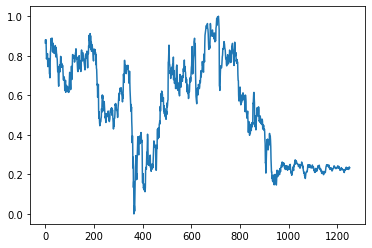

In [76]:
plt.plot(y_scaled)

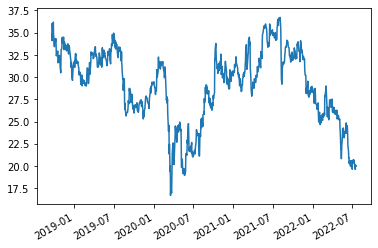

In [77]:
df['close'].plot()

In [78]:
prediction = model.predict(X_scaled)

In [79]:
y_predicted=y_scaler.inverse_transform(prediction)

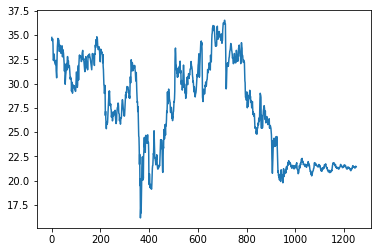

In [80]:
plt.plot(y_predicted)

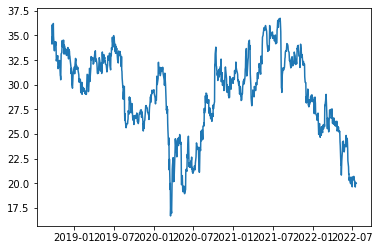

In [81]:
plt.plot(df['close'])

In [57]:
display(len(X_scaled))
display(len(y_scaled))

1151

1151